In [1]:
from os.path import join as pathjoin 
from os import sep
import utils.core_utils as core_utils
import utils.object_detection as od

device = core_utils.device


path = 'ltaodataservice/Traffic-Imagesv2'
camera_id = '1703'
dataset_dir = pathjoin(core_utils.datasets_dir, 'datamall', path.replace('/', sep).replace('?', ''), camera_id, '')

image_file = "1703_20230612143641.jpg"

filepath = pathjoin(dataset_dir, image_file)


In [12]:
import importlib
import utils.object_detection as od
import utils.weather_detection as wd
import utils.anomaly_detection as ad

importlib.reload(utils.object_detection)
importlib.reload(utils.weather_detection)
importlib.reload(utils.anomaly_detection)

import utils.object_detection as od
import utils.weather_detection as wd
import utils.anomaly_detection as ad


Global seed set to 42
C:\Users\foxel\anaconda3\envs\EMIA-gpu\lib\site-packages\anomalib\config\config.py:275: UserWarning: config.project.unique_dir is set to False. This does not ensure that your results will be written in an empty directory and you may overwrite files.
  warn(
Global seed set to 42


42
42


C:\Users\foxel\anaconda3\envs\EMIA-gpu\lib\site-packages\anomalib\config\config.py:275: UserWarning: config.project.unique_dir is set to False. This does not ensure that your results will be written in an empty directory and you may overwrite files.
  warn(


# Object Detection

In [4]:
class_df = od.detect_objects(dataset_dir, keep_all_detected_classes=True, file_list=[filepath])
print(class_df)

YOLOR  14bd977 torch 1.13.1 CUDA:0 (NVIDIA GeForce RTX 3060 Laptop GPU, 6143.5MB)



Reading images from D:\data\emia\datamall\ltaodataservice\Traffic-Imagesv2\1703\
Fusing layers... 


Model Summary: 306 layers, 36905341 parameters, 6652669 gradients


RepConv.fuse_repvgg_block
RepConv.fuse_repvgg_block
RepConv.fuse_repvgg_block
Number of images to process: 1

1 labels saved to runs\detect\exp\labels
Done. (0.100s)
Detection results are saved at D:\git\github\EMIA-demo\runs\detect\exp\labels
   bus  car  truck  total_pedestrians  total_vehicles            datetime
0    2   11      3                  0              16 2023-06-12 14:36:41


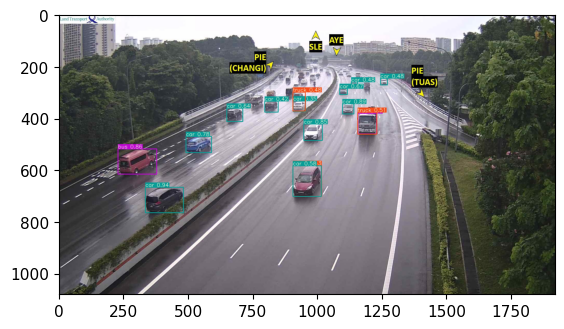


Detected objects in the image:
bus                                    2
car                                   11
truck                                  3
total_pedestrians                      0
total_vehicles                        16
datetime             2023-06-12 14:36:41
Name: 0, dtype: object


In [7]:
import os
import shutil 
import cv2
import matplotlib.pyplot as plt
from PIL import Image

%matplotlib inline 

result_dir = pathjoin(os.getcwd(), 'runs', 'detect', 'exp', image_file)


plt.figure()
img = Image.open(result_dir)
plt.imshow(img)
plt.show()

print('\nDetected objects in the image:')
print(class_df.iloc[0])

# Weather Prediction 

In [11]:
labels, prob = wd.apply(filepath)

Loaded pretrained weights for efficientnet-b7
Model is loaded from location: D:\models\EMIA\weather_from_image\efficientnet-b8-finetuned-v4.pts

Predictions with fine-tuned-efficientnet-b7-----
Rain                                                                        (33.75%)
Clouds                                                                      (30.64%)
Thunderstorm                                                                (19.46%)
Clear                                                                       (16.16%)


### Errors 

-  UserWarning: Metric `PrecisionRecallCurve` will save all targets and predictions in buffer. For large datasets this may lead to large memory footprint. 

def training_epoch_end(self, outputs):
     self.accuracy.reset()
- FeatureExtractor is deprecated. Use TimmFeatureExtractor instead. Both FeatureExtractor and TimmFeatureExtractor will be removed in a future release.

- UserWarning: Export option: None not found. Defaulting to no model export

- LightningDeprecationWarning: Setting `Trainer(resume_from_checkpoint=)` is deprecated in v1.5 and will be removed in v2.0. Please pass `Trainer.fit(ckpt_path=)` directly instead.

- No config file has been provided. Using default transforms.



In [14]:
best_model_path = "D:\\git\\github\\EMIA\\runs\\reverse_distillation\\1704\\run\\weights\\lightning\\model-v3.ckpt"
ad.infer(best_model_path, filepath)

Loading the model.
Initializing ReverseDistillationLightning model.
FeatureExtractor is deprecated. Use TimmFeatureExtractor instead. Both FeatureExtractor and TimmFeatureExtractor will be removed in a future release.
Loading pretrained weights from url (https://github.com/rwightman/pytorch-image-models/releases/download/v0.1-weights/wide_resnet50_racm-8234f177.pth)
Loading the callbacks
GPU available: True (cuda), used: True
TPU available: False, using: 0 TPU cores
IPU available: False, using: 0 IPUs
HPU available: False, using: 0 HPUs
`Trainer(limit_train_batches=1.0)` was configured so 100% of the batches per epoch will be used..
`Trainer(limit_val_batches=1.0)` was configured so 100% of the batches will be used..
`Trainer(limit_test_batches=1.0)` was configured so 100% of the batches will be used..
`Trainer(limit_predict_batches=1.0)` was configured so 100% of the batches will be used..
`Trainer(val_check_interval=1.0)` was configured so validation will run at the end of the traini

Predicting: 0it [00:00, ?it/s]

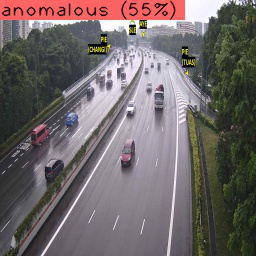

In [15]:
display(Image.open(pathjoin(ad.infer_results, camera_id, image_file)))

In [1]:
from os.path import join as pathjoin
import os
from os import sep

import utils.core_utils as core_utils
import utils.object_detection as od
import utils.weather_detection as wd
import utils.anomaly_detection as ad

from PIL import Image
import gradio as gr

device = core_utils.device


path = 'ltaodataservice/Traffic-Imagesv2'
camera_id = '1703'
dataset_dir = pathjoin(core_utils.datasets_dir, 'datamall', path.replace('/', sep).replace('?', ''), camera_id, '')
image_file = "1703_20230612143641.jpg"
default_filepath = pathjoin(dataset_dir, image_file)

def detect_current_state(file_obj):
    filepath = file_obj.name   
    img = Image.open(filepath)
    image_file = filepath.split(sep)[-1]
    camera_id = filepath.split(sep)[-2]
    
    print(f'Reading image from {filepath}.')
    print(f'Folder: {camera_id}\nImage filename: {image_file}')
    
    object_df = od.detect_objects(dataset_dir, keep_all_detected_classes=True, file_list=[filepath])
    object_result_dir = pathjoin(os.getcwd(), 'runs', 'detect', 'exp', image_file)
    vehicle_img = Image.open(object_result_dir)
    
    label, prob = wd.apply(filepath)
    weather_label ='{label:<75} ({p:.2f}%)'.format(label=label, p=prob)
    
    
    best_model_path_anomaly = "D:\\git\\github\\EMIA\\runs\\reverse_distillation\\1704\\run\\weights\\lightning\\model-v3.ckpt"
    ad.infer(best_model_path_anomaly, filepath)
    
    anomaly_img = Image.open(pathjoin(ad.infer_results, camera_id, image_file))

    return img, vehicle_img, object_df, weather_label, anomaly_img

title = "Digital twin of Singapore"
description = "Describe the current situation on the road."
demo = gr.Interface(fn=detect_current_state, inputs="file", outputs=["image", "image", "dataframe", "label", "image"],
                    title=title, description=description)
demo.launch()


Global seed set to 42


42


C:\Users\foxel\anaconda3\envs\EMIA-gpu\lib\site-packages\anomalib\config\config.py:275: UserWarning: config.project.unique_dir is set to False. This does not ensure that your results will be written in an empty directory and you may overwrite files.
  warn(


Running on local URL:  http://127.0.0.1:7860

To create a public link, set `share=True` in `launch()`.


YOLOR  14bd977 torch 1.13.1 CUDA:0 (NVIDIA GeForce RTX 3060 Laptop GPU, 6143.5MB)



Reading image from C:\Users\foxel\AppData\Local\Temp\gradio\760adc16ed570526a10daa6be07a43c23b1542e6\1703_20230425140032.jpg.
Folder: 760adc16ed570526a10daa6be07a43c23b1542e6
Image filename: 1703_20230425140032.jpg
eeeeeeReading images from D:\data\emia\datamall\ltaodataservice\Traffic-Imagesv2\1703\
Fusing layers... 


Model Summary: 306 layers, 36905341 parameters, 6652669 gradients


RepConv.fuse_repvgg_block
RepConv.fuse_repvgg_block
RepConv.fuse_repvgg_block
Number of images to process: 1


C:\Users\foxel\anaconda3\envs\EMIA-gpu\lib\site-packages\torch\functional.py:504: UserWarning: torch.meshgrid: in an upcoming release, it will be required to pass the indexing argument. (Triggered internally at C:\cb\pytorch_1000000000000\work\aten\src\ATen\native\TensorShape.cpp:3191.)
  return _VF.meshgrid(tensors, **kwargs)  # type: ignore[attr-defined]



1 labels saved to runs\detect\exp\labels
Done. (0.169s)

Detection results are saved at D:\git\github\EMIA-demo\runs\detect\exp\labels

Loaded pretrained weights for efficientnet-b7
Model is loaded from location: D:\models\EMIA\weather_from_image\efficientnet-b8-finetuned-v4.pts


C:\Users\foxel\anaconda3\envs\EMIA-gpu\lib\site-packages\anomalib\config\config.py:275: UserWarning: config.project.unique_dir is set to False. This does not ensure that your results will be written in an empty directory and you may overwrite files.
  warn(
Loading the model.
Initializing ReverseDistillationLightning model.
C:\Users\foxel\anaconda3\envs\EMIA-gpu\lib\site-packages\torchmetrics\utilities\prints.py:36: UserWarning: Metric `PrecisionRecallCurve` will save all targets and predictions in buffer. For large datasets this may lead to large memory footprint.
  warnings.warn(*args, **kwargs)
FeatureExtractor is deprecated. Use TimmFeatureExtractor instead. Both FeatureExtractor and TimmFeatureExtractor will be removed in a future release.



Predictions with fine-tuned-efficientnet-b7-----
Clouds                                                                      (55.52%)
Rain                                                                        (24.47%)
Thunderstorm                                                                (10.54%)
Clear                                                                       (9.47%)
1


Loading pretrained weights from url (https://github.com/rwightman/pytorch-image-models/releases/download/v0.1-weights/wide_resnet50_racm-8234f177.pth)
Loading the callbacks
C:\Users\foxel\anaconda3\envs\EMIA-gpu\lib\site-packages\anomalib\utils\callbacks\__init__.py:142: UserWarning: Export option: None not found. Defaulting to no model export
  warnings.warn(f"Export option: {config.optimization.export_mode} not found. Defaulting to no model export")
C:\Users\foxel\anaconda3\envs\EMIA-gpu\lib\site-packages\pytorch_lightning\trainer\connectors\checkpoint_connector.py:55: LightningDeprecationWarning: Setting `Trainer(resume_from_checkpoint=)` is deprecated in v1.5 and will be removed in v2.0. Please pass `Trainer.fit(ckpt_path=)` directly instead.
  rank_zero_deprecation(
GPU available: True (cuda), used: True
TPU available: False, using: 0 TPU cores
IPU available: False, using: 0 IPUs
HPU available: False, using: 0 HPUs
`Trainer(limit_train_batches=1.0)` was configured so 100% of the b

Predicting: 0it [00:00, ?it/s]